In [ ]:
import mlrose2 as mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
import time

## Data Preparation

In [3]:
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()

#Spliting data into training, testing set 
np.random.seed(0)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size = 0.2, random_state=999)

# One hot encode target values
one_hot = OneHotEncoder(categories='auto')

Ytrain = one_hot.fit_transform(Ytrain.reshape(-1, 1)).todense()
Ytest = one_hot.fit_transform(Ytest.reshape(-1, 1)).todense()

In [4]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

In [4]:
len(Xtrain[1])

4

In [5]:
len(Xtrain)

120

## Backpropagation

In [12]:
start = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20), random_state=1, max_iter=200)
clf.fit(Xtrain, Ytrain)

end = time.time()
print("--- %s seconds ---" % (end - start))

--- 0.0953519344329834 seconds ---


In [13]:
# Predict labels for train set and assess accuracy
Ytrain_pred = clf.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = clf.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 1.0 ---
--- Test F1: 0.9563636363636364 ---


## Randomized hill climbing

In [14]:
# Initialize neural network object and fit object
start = time.time()
np.random.seed(3)
max_iters = 10000

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'tanh', \
                                 algorithm = 'random_hill_climb', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_model1.fit(Xtrain, Ytrain)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 23.726542711257935 seconds ---


In [15]:
# Predict labels for train set and assess accuracy
Ytrain_pred = nn_model1.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = nn_model1.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 1.0 ---
--- Test F1: 0.9563636363636364 ---


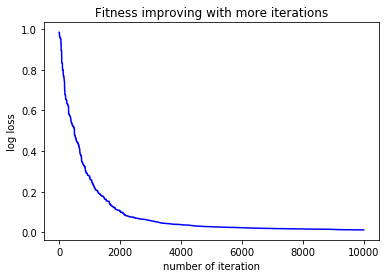

In [17]:
# loss change with number of iterations 
pd.DataFrame(nn_model1.current_best_loss).to_csv("nn_iris_randomized_hill_climb_{}iter_loss.csv".format(max_iters))
plt.plot(range(1, max_iters+1), nn_model1.current_best_loss, color = 'blue')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.title("Fitness improving with more iterations")
plt.show()

In [18]:
# best weight
print("--- Number of weight: %s ---" % len(nn_model1.fitted_weights))
print("--- Min fitted weight: %s ---" % min(nn_model1.fitted_weights))
print("--- Max fitted weight: %s ---" % max(nn_model1.fitted_weights))
print("--- Mean fitted weight: %s ---" % (sum(nn_model1.fitted_weights)/len(nn_model1.fitted_weights)))

--- Number of weight: 160 ---
--- Min fitted weight: -4.279309854542171 ---
--- Max fitted weight: 3.9602495804986337 ---
--- Mean fitted weight: 0.0322324850250591 ---


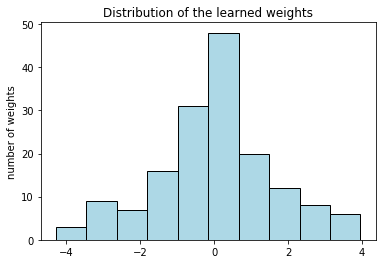

In [19]:
plt.hist(nn_model1.fitted_weights, color = 'lightblue', edgecolor = 'black')
plt.ylabel("number of weights")
plt.title('Distribution of the learned weights')
plt.show()

## simulated annealing

In [20]:
start = time.time()
# Initialize neural network object and fit object
np.random.seed(3)
max_iters = 10000

nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', schedule=mlrose.GeomDecay(init_temp=10000, decay=0.95, min_temp=0.01),\
                                 max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_model2.fit(Xtrain, Ytrain)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 35.42280554771423 seconds ---


In [21]:
# Predict labels for train set and assess accuracy
Ytrain_pred = nn_model2.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = nn_model2.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 0.9339774557165862 ---
--- Test F1: 0.8857142857142857 ---


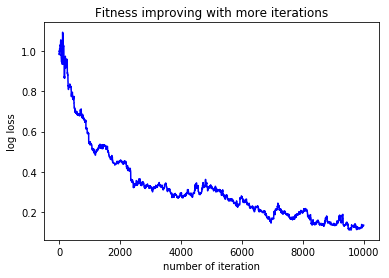

In [22]:
# loss change with number of iterations 
pd.DataFrame(nn_model2.current_best_loss).to_csv("nn_iris_simulated_annealing_{}iter_loss.csv".format(max_iters))
plt.plot(range(1, max_iters+1), nn_model2.current_best_loss, color = 'blue')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.title("Fitness improving with more iterations")
plt.show()

In [23]:
# best weight
print("--- Number of weight: %s ---" % len(nn_model2.fitted_weights))
print("--- Min fitted weight: %s ---" % min(nn_model2.fitted_weights))
print("--- Max fitted weight: %s ---" % max(nn_model2.fitted_weights))
print("--- Mean fitted weight: %s ---" % (sum(nn_model2.fitted_weights)/len(nn_model2.fitted_weights)))

--- Number of weight: 160 ---
--- Min fitted weight: -2.452752661561286 ---
--- Max fitted weight: 2.282839238062297 ---
--- Mean fitted weight: -0.06526751497494092 ---


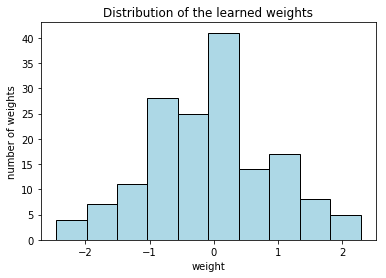

In [24]:
plt.hist(nn_model2.fitted_weights, color = 'lightblue', edgecolor = 'black')
plt.xlabel("weight")
plt.ylabel("number of weights")
plt.title('Distribution of the learned weights')
plt.show()

## genetic algorithm

In [29]:
start = time.time()
# Initialize neural network object and fit object
np.random.seed(3)
max_iters = 10000

nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'tanh', \
                                 algorithm = 'genetic_alg', pop_size = 200, mutation_prob = 0.1, max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = False, clip_max = 5, max_attempts = 100)

nn_model3.fit(Xtrain, Ytrain)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 3924.8787126541138 seconds ---


In [30]:
# Predict labels for train set and assess accuracy
Ytrain_pred = nn_model3.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = nn_model3.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 1.0 ---
--- Test F1: 0.9563636363636364 ---


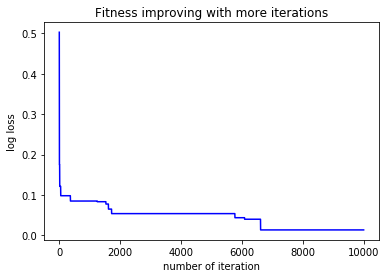

In [31]:
# loss change with number of iterations 
pd.DataFrame(nn_model3.current_best_loss).to_csv("nn_iris_GA_{}iter_current_best_loss.csv".format(max_iters))
plt.plot(range(1, max_iters+1), nn_model3.current_best_loss, color = 'blue')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.title("Fitness improving with more iterations")
plt.show()

In [32]:
# best weight
print("--- Number of weight: %s ---" % len(nn_model3.fitted_weights))
print("--- Min fitted weight: %s ---" % min(nn_model3.fitted_weights))
print("--- Max fitted weight: %s ---" % max(nn_model3.fitted_weights))
print("--- Mean fitted weight: %s ---" % (sum(nn_model3.fitted_weights)/len(nn_model3.fitted_weights)))

--- Number of weight: 160 ---
--- Min fitted weight: -4.936252821386785 ---
--- Max fitted weight: 4.983902221547044 ---
--- Mean fitted weight: 0.34142073796406375 ---


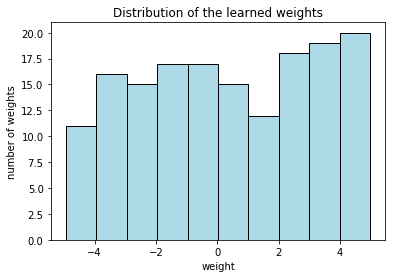

In [33]:
plt.hist(nn_model3.fitted_weights, color = 'lightblue', edgecolor = 'black')
plt.ylabel("number of weights")
plt.xlabel("weight")
plt.title('Distribution of the learned weights')
plt.show()

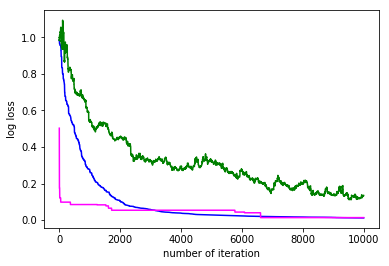

In [38]:
plt.plot(range(1, max_iters+1), nn_model1.current_best_loss, color = 'blue')
plt.plot(range(1, max_iters+1), nn_model2.current_best_loss, color = 'green')
plt.plot(range(1, max_iters+1), nn_model3.current_best_loss, color = 'magenta')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.show()